## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

amp_true   = 6
mu_true    = 15
sigma_true = 19

### We want to find the optimal parameters for a Gaussian function that fits the data. The Gaussian function is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

<hr>

## Functions

In [2]:
def func(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

def jacobian(x, amp, mu, sigma):
    return np.array([
                                         np.exp(-(x - mu)**2 / (2 * sigma**2)), # Partial derivative with respect to amp
        amp * ((x - mu) / sigma**2)    * np.exp(-(x - mu)**2 / (2 * sigma**2)), # Partial derivative with respect to mu
        amp * ((x - mu)**2 / sigma**3) * np.exp(-(x - mu)**2 / (2 * sigma**2))  # Partial derivative with respect to sigma
    ]).T

def loss_function(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

<hr>

## Data

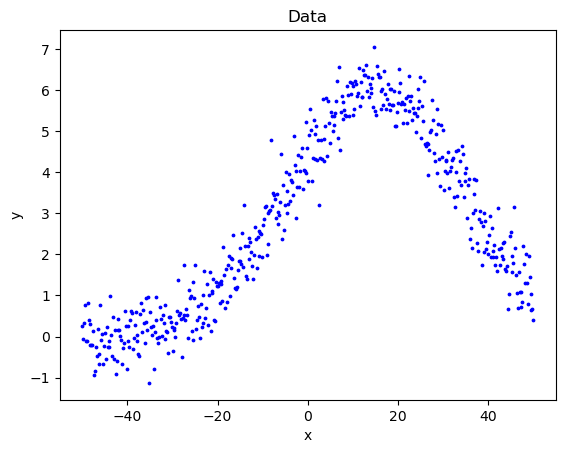

In [3]:
x_data = np.linspace(-50, 50, 500)
y_data = func(x_data, amp_true, mu_true, sigma_true) + np.random.normal(0, 0.5, x_data.size) # Adding random noise to the data

plt.scatter(x_data, y_data, s=3, color='blue')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<hr>

## Levenberg-Marquardt Algorithm

In [4]:
# Levenberg-Marquardt algorithm
def levenberg_marquardt(x_data, y_data, amp_init, mu_init, sigma_init, lambda_init=0.01, max_iter=100, tol=1e-6):
    params    = np.array([amp_init, mu_init, sigma_init], dtype=np.float64)
    lambda_   = lambda_init
    losses    = []
    conv_flag = False

    for i in range(max_iter):
        y_pred = func(x_data, params[0], params[1], params[2])
        loss   = loss_function(y_data, y_pred)
        losses.append(loss)

        J        = jacobian(x_data, params[0], params[1], params[2])
        H        = J.T @ J
        gradient = J.T @ (y_data - y_pred)

        H_lm     = H + lambda_ * np.eye(H.shape[0])

        try:
            delta = np.linalg.solve(H_lm, gradient)
        except np.linalg.LinAlgError:
            print("Singular matrix encountered, stopping early.")
            break

        new_params = params + delta
        new_loss   = loss_function(y_data, func(x_data, new_params[0], new_params[1], new_params[2]))

        if new_loss < loss:
            params   = new_params
            lambda_ /= 10
        else:
            lambda_ *= 10

        if np.abs(loss - new_loss) < tol and not conv_flag:
            print(f"Convergence achieved after {i + 1} iterations.")
            conv_flag = True

    return params[0], params[1], params[2], losses

<hr>

## Execution

In [5]:
# Initial parameters and settings
amp_init    = 1
mu_init     = 0
sigma_init  = 1
lambda_init = 0.01
max_iter    = 100

# Run the Levenberg-Marquardt algorithm
amp_final, mu_final, sigma_final, losses = levenberg_marquardt(x_data, y_data, amp_init, mu_init, sigma_init, lambda_init, max_iter)

Convergence achieved after 8 iterations.


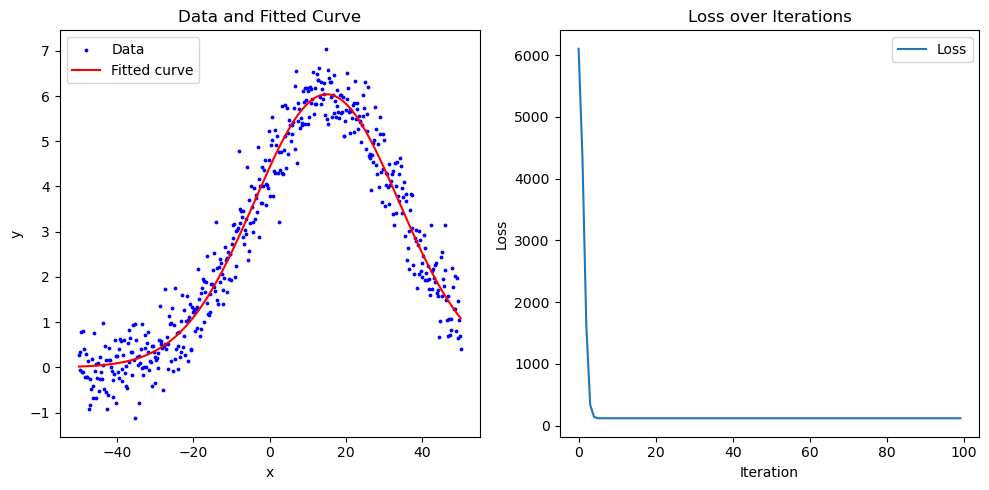

Final parameters: 6.040279403868619 14.91276025494098 18.947133572331325


In [6]:
# Plotting the results
plt.figure(figsize=(10, 5))

# Plot the synthetic data and the fitted curve
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, label='Data', color='blue', s=3)
plt.plot(x_data, func(x_data, amp_final, mu_final, sigma_final), label='Fitted curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Curve')

# Plot the loss over iterations
plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Iterations')

plt.tight_layout()
plt.show()

print("Final parameters:", amp_final, mu_final, sigma_final)

<hr>

## Impact of initialisation of lambda on convergence

Convergence achieved after 8 iterations.
Lambda = 0.01: Final parameters = 6.040279403868619, 14.91276025494098, 18.947133572331325

Convergence achieved after 8 iterations.
Lambda = 0.1: Final parameters = 6.040279403824371, 14.912760255106564, 18.947133572621613

Convergence achieved after 8 iterations.
Lambda = 1: Final parameters = 6.0402794035684355, 14.912760256118412, 18.947133574301663

Convergence achieved after 8 iterations.
Lambda = 10: Final parameters = 6.040279403662689, 14.912760255704974, 18.947133573682194

Convergence achieved after 8 iterations.
Lambda = 100: Final parameters = 6.0402794040988335, 14.912760254079105, 18.947133570821013



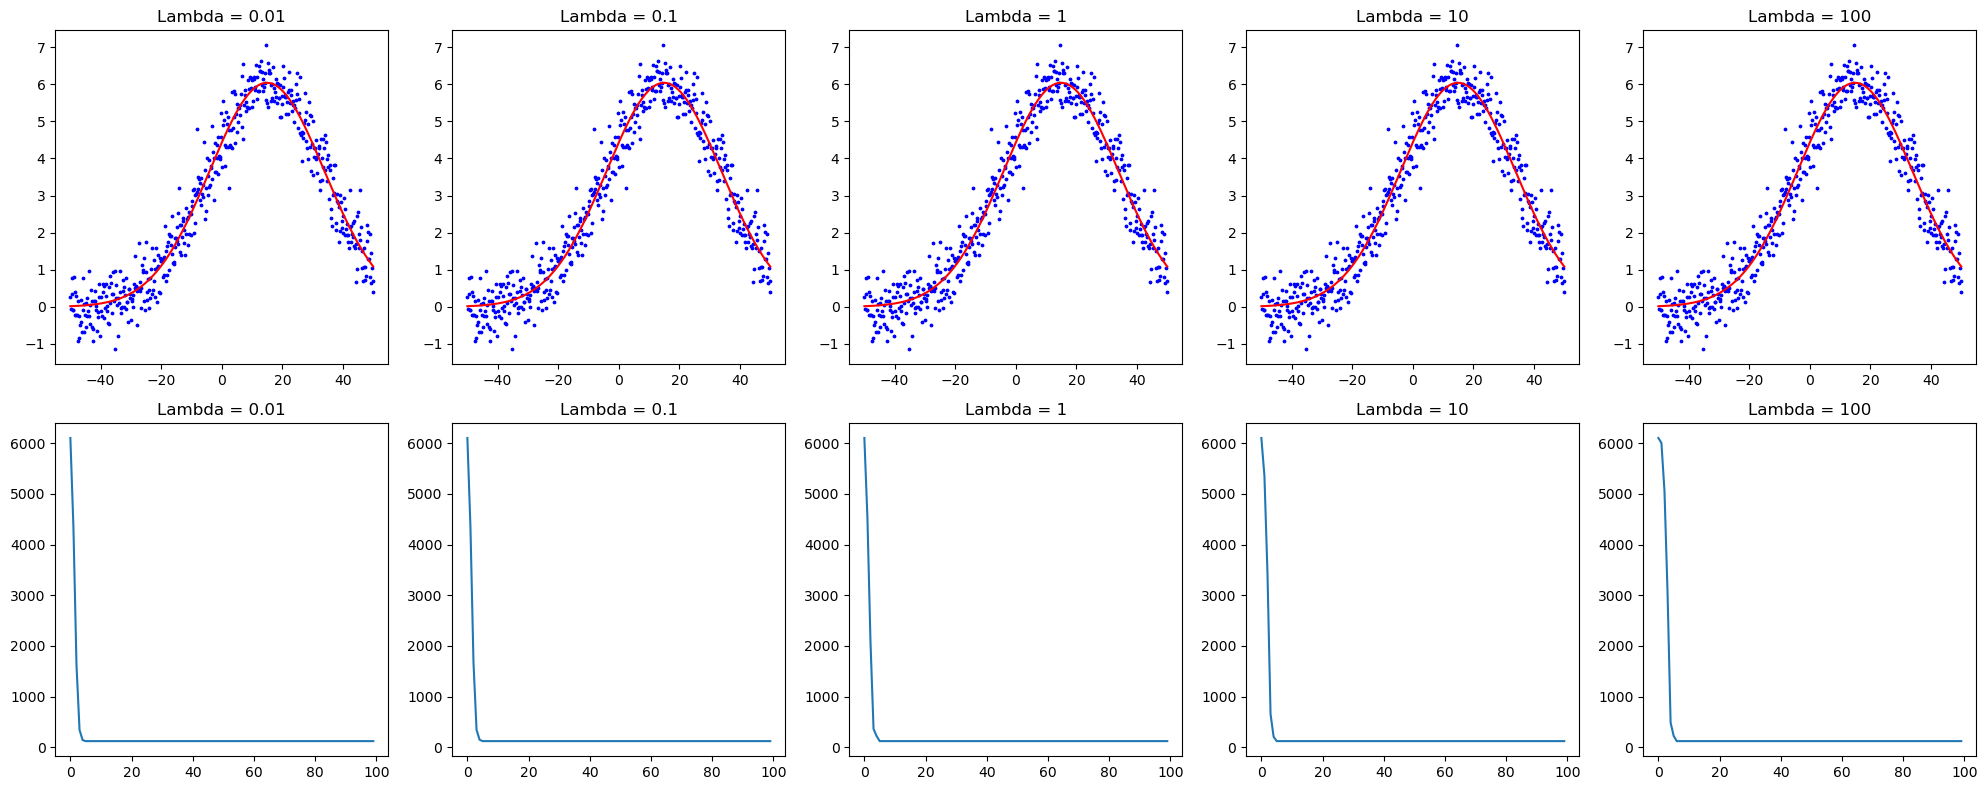

In [7]:
_, axs = plt.subplots(2, 5, figsize=(20, 8))

lambdas = [0.01, 0.1, 1, 10, 100]

for i, lambda_ in enumerate(lambdas):
    amp_final, mu_final, sigma_final, losses = levenberg_marquardt(x_data, y_data, amp_init, mu_init, sigma_init, lambda_, max_iter)
    axs[0, i].scatter(x_data, y_data, s=3, color='blue')
    axs[0, i].plot(x_data, func(x_data, amp_final, mu_final, sigma_final), color='red')
    axs[0, i].set_title(f"Lambda = {lambda_}")

    axs[1, i].plot(losses)
    axs[1, i].set_title(f"Lambda = {lambda_}")

    print(f"Lambda = {lambda_}: Final parameters = {amp_final}, {mu_final}, {sigma_final}")
    print()

plt.tight_layout()
plt.show()

<hr>

## Impact of initialisation of parameters on convergence

Convergence achieved after 7 iterations.
Initial parameters = 2.92, 1.42, 4.20: Final parameters = 6.04, 14.91, 18.95

Convergence achieved after 8 iterations.
Initial parameters = 9.73, 2.12, 3.14: Final parameters = 6.04, 14.91, 18.95

Convergence achieved after 15 iterations.
Initial parameters = -7.96, -6.94, 3.21: Final parameters = 6.04, 14.91, 18.95

Convergence achieved after 15 iterations.
Initial parameters = -6.79, -6.27, 3.57: Final parameters = 6.04, 14.91, 18.95

Convergence achieved after 9 iterations.
Initial parameters = -6.53, 7.94, 1.72: Final parameters = 6.04, 14.91, -18.95



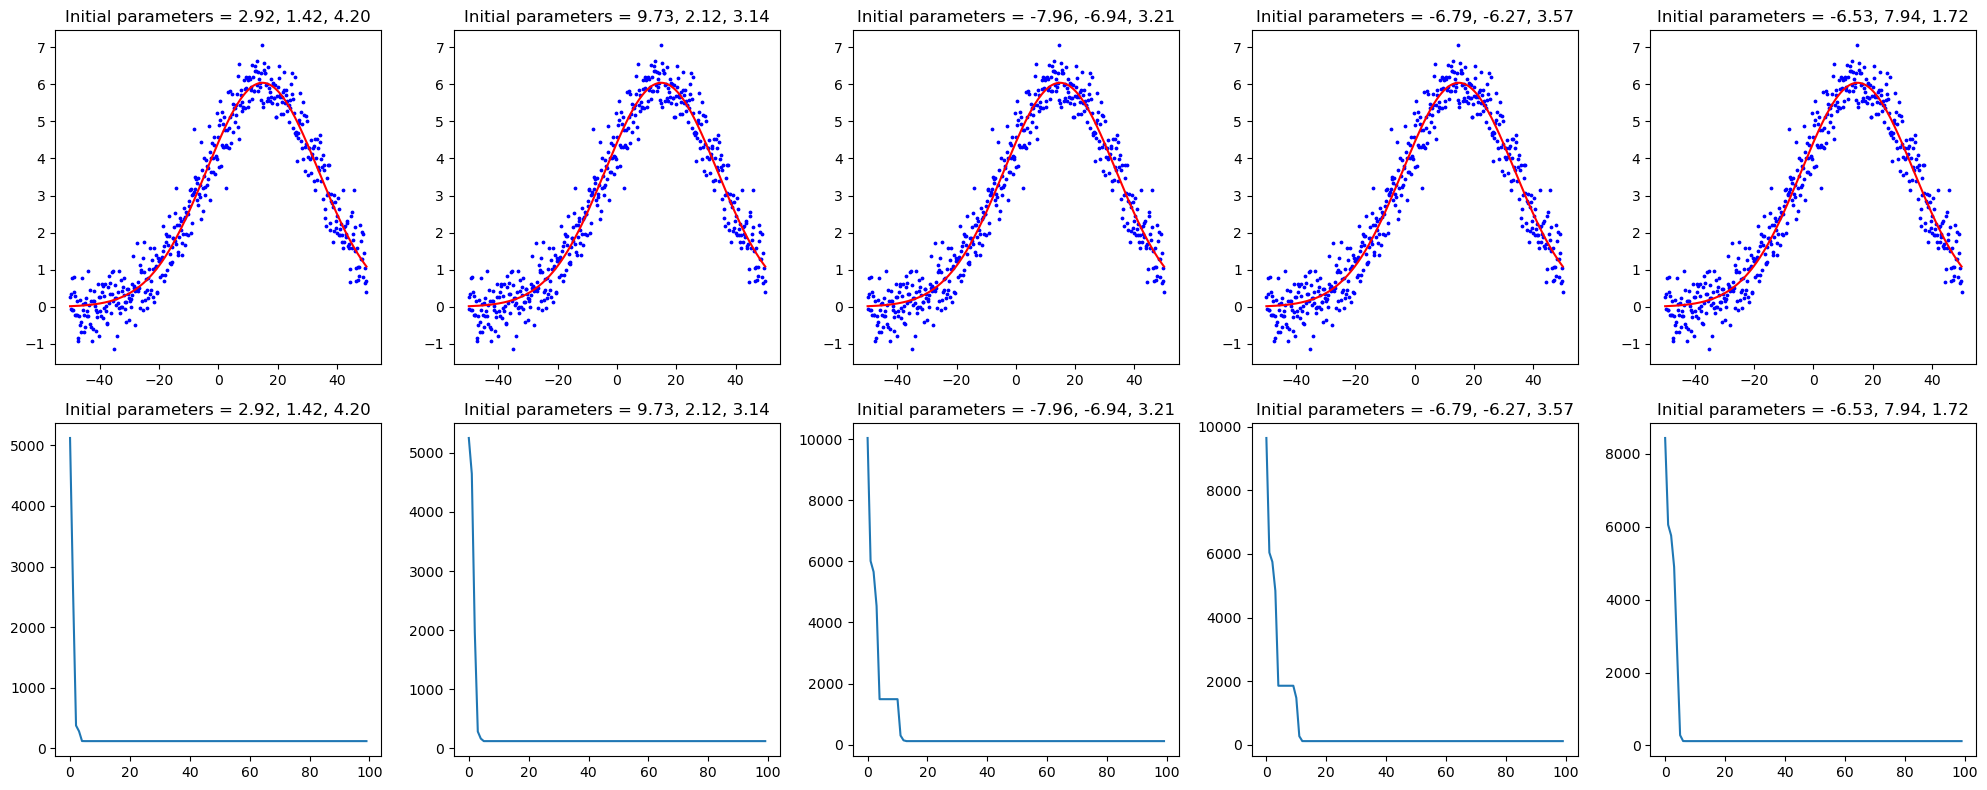

In [8]:
_, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    amp_init   = np.random.uniform(-10, 10)
    mu_init    = np.random.uniform(-10, 10)
    sigma_init = np.random.uniform(1, 10)

    amp_final, mu_final, sigma_final, losses = levenberg_marquardt(x_data, y_data, amp_init, mu_init, sigma_init, lambda_init, max_iter)
    axs[0, i].scatter(x_data, y_data, s=3, color='blue')
    axs[0, i].plot(x_data, func(x_data, amp_final, mu_final, sigma_final), color='red')
    axs[0, i].set_title(f"Initial parameters = {amp_init:.2f}, {mu_init:.2f}, {sigma_init:.2f}")

    axs[1, i].plot(losses)
    axs[1, i].set_title(f"Initial parameters = {amp_init:.2f}, {mu_init:.2f}, {sigma_init:.2f}")

    print(f"Initial parameters = {amp_init:.2f}, {mu_init:.2f}, {sigma_init:.2f}: Final parameters = {amp_final:.2f}, {mu_final:.2f}, {sigma_final:.2f}")
    print()

plt.tight_layout()
plt.show()

<hr>